In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from sklearn.model_selection import train_test_split

# Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation Models 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Load training dataset 
titanic = pd.read_csv("train.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display statistics of non-numeric variables
titanic.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wheadon, Mr. Edward H",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
# check missing values for each variable
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Load dataset for prediction 
holdout = pd.read_csv("holdout_test.csv")
holdout.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Survived       0 non-null float64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [9]:
holdout.isnull().sum()

Survived       418
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Display statistics of non-numeric variables
holdout.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Clark, Mr. Walter Miller",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [11]:
# Embarked: Very small numbers of missing values, can impute with the most popular port of embarkation 
titanic["Embarked"] = titanic["Embarked"].fillna("S")
holdout["Embarked"] = holdout["Embarked"].fillna("S")

In [12]:
# Fare: 1 missing value in the testing data. Impute with mean
holdout["Fare"] = holdout["Fare"].fillna(holdout['Fare'].mean())

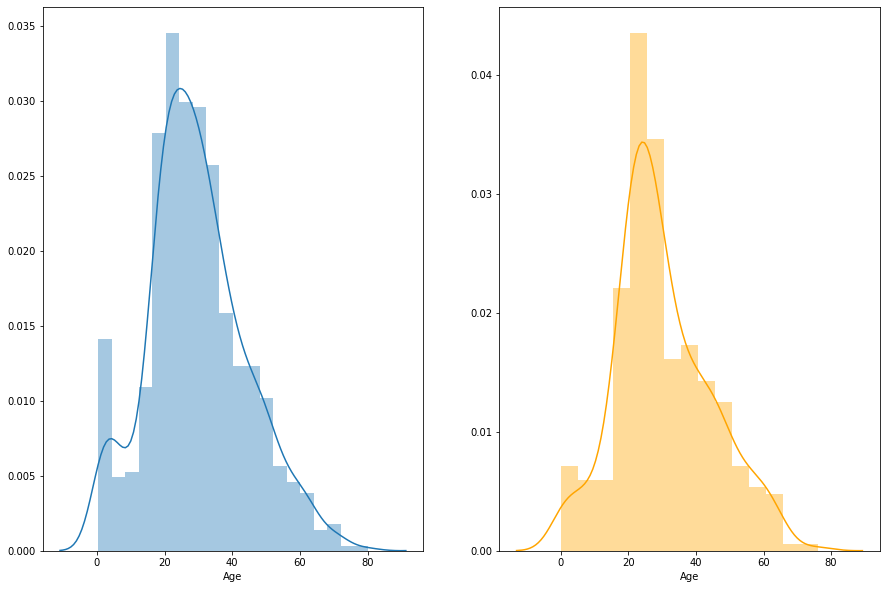

In [13]:
# Age - visualize distribution first
fig, (axis1,axis2) = plt.subplots(1,2,figsize = (15,10))
sns.distplot(titanic[titanic['Age'].notnull()]['Age'], ax = axis1)
sns.distplot(holdout[holdout['Age'].notnull()]['Age'], ax = axis2, color = 'orange')

In [14]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
holdout['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [16]:
# Impute to fill missing values in Age 
titanic['Age'] = titanic['Age'].interpolate()
holdout['Age'] = holdout['Age'].interpolate()

In [17]:
titanic['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
holdout['Age'].describe()

count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64

In [19]:
# Cabin: very large numbers of missing values, which is too many to impute. I'm going to drop it. 
titanic.drop(columns = ['Cabin'], inplace = True)
holdout.drop(columns = ['Cabin'], inplace = True)

titanic.isnull().sum() # Now there's no more missing values in the titanic dataset. 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
# Create new variable "Is_child" for passenger aged 15 or below 
titanic["Is_child"] = titanic["Age"].apply(lambda x: 1 if x <= 15 else 0)
holdout["Is_child"] = holdout["Age"].apply(lambda x: 1 if x <= 15 else 0)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [21]:
# Create new variable "Family" to indicate the number of family members on board and drop SipSp and Parch columns
titanic["Family"] = titanic["SibSp"] + titanic["Parch"]
titanic = titanic.drop(['SibSp','Parch'], axis = 1)

holdout["Family"] = holdout["SibSp"] + holdout["Parch"]
holdout = holdout.drop(['SibSp','Parch'], axis = 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Is_child,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0


In [22]:
# Create new variable "Is_alone" to indicate whether an individual was alone 
titanic["Is_alone"] = titanic["Family"].apply(lambda x: 1 if x == 0 else 0)
holdout["Is_alone"] = holdout["Family"].apply(lambda x: 1 if x == 0 else 0)

titanic["Is_alone"].value_counts()

1    537
0    354
Name: Is_alone, dtype: int64

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Is_child       891 non-null int64
Family         891 non-null int64
Is_alone       891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [24]:
# Drop columns we no longer need
titanic.drop(columns=['PassengerId','Name','Ticket'], inplace=True)
holdout.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Is_child    891 non-null int64
Family      891 non-null int64
Is_alone    891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Having processed some variables, now I'd like to visualize the correlations between survival and different variables. 

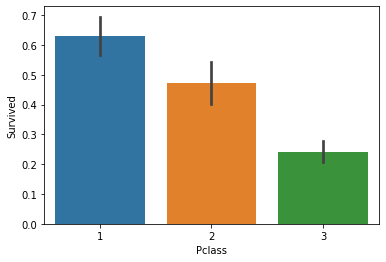

In [25]:
# Visualize correlation between pclass and survival 
sns.barplot(x=titanic["Pclass"], y=titanic["Survived"])
# PClass 1 has the highest chance of survival vs PClass 3 lowest. 

Text(0.5, 0.95, 'Survival Distribution and Gender')

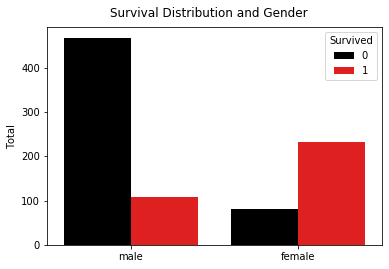

In [26]:
# Visualize correlation between sex and survival
fig = plt.figure()
ax = sns.countplot(x='Sex', 
                   hue='Survived', 
                   palette={0:'black', 1:'red'}, 
                   data=titanic)
ax.set(xlabel='', ylabel='Total')
fig.suptitle("Survival Distribution and Gender", y=0.95)
# Females are more likely to survive compared to males

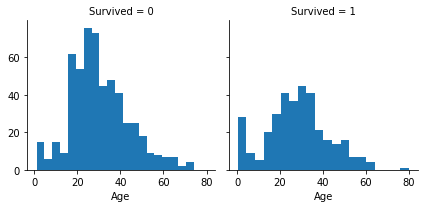

In [27]:
# Visualize correlation between age and survival
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

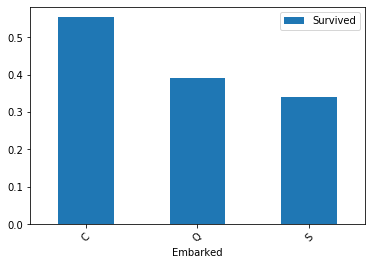

In [28]:
# Visualize correlation between port of embarkation and survival
x=titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)
print(x)
x.plot(kind='bar')
plt.xticks(rotation=45)

# Those embarked from port C are most likely to survive. 

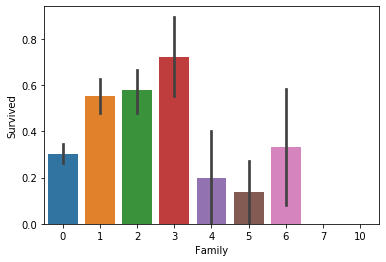

In [29]:
# Visualize correlation between traveling with family and survival
sns.barplot(x=titanic["Family"], y=titanic["Survived"])
# Seems like one who travels with 3 family members are most likely to survive. 

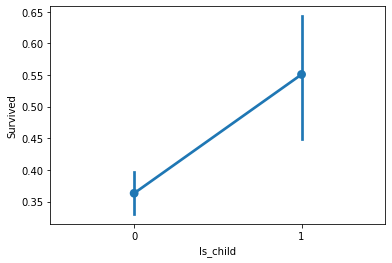

In [30]:
# Visualize correlation between is_child and survival 
sns.pointplot(x = 'Is_child', y = 'Survived', data = titanic)

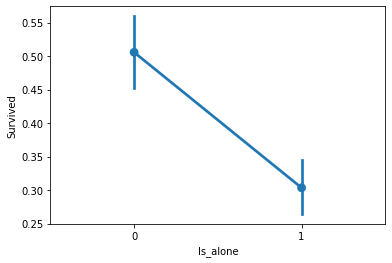

In [31]:
# Visualize correlation between is_alone and survival 
sns.pointplot(x = 'Is_alone', y = 'Survived', data = titanic)

/Users/arielsmac/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/arielsmac/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/arielsmac/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


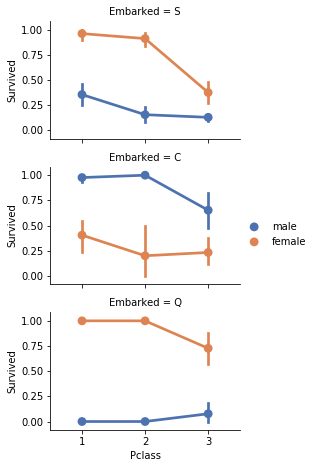

In [32]:
# Multi-dimensional analysis
grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Having visualized the data, let's finish converting the categorical variables

In [33]:
# Convert Sex to numeric variable
titanic['Sex'] = titanic["Sex"].map({"female":1,"male":0}).astype(int)
holdout['Sex'] = holdout["Sex"].map({"female":1,"male":0}).astype(int)

In [34]:
# Convert Embarked to numeric values 
titanic['Embarked'] = titanic['Embarked'].map({'S':0,'C':1,'Q':2})
holdout['Embarked'] = holdout['Embarked'].map({'S':0,'C':1,'Q':2})
titanic.info()
# Now all features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int64
Is_child    891 non-null int64
Family      891 non-null int64
Is_alone    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [35]:
# Standardization of Fare 
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(np.array(titanic['Fare']).reshape((titanic.shape[0], 1)))
titanic['Fare']= std.transform(np.array(titanic['Fare']).reshape((titanic.shape[0], 1)))

std1 = StandardScaler().fit(np.array(holdout['Fare']).reshape((holdout.shape[0], 1)))
holdout['Fare']= std1.transform(np.array(holdout['Fare']).reshape((holdout.shape[0], 1)))

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Is_child,Family,Is_alone
0,0,3,0,22.0,-0.502445,0,0,1,0
1,1,1,1,38.0,0.786845,1,0,1,0
2,1,3,1,26.0,-0.488854,0,0,0,1
3,1,1,1,35.0,0.420730,0,0,1,0
4,0,3,0,35.0,-0.486337,0,0,0,1


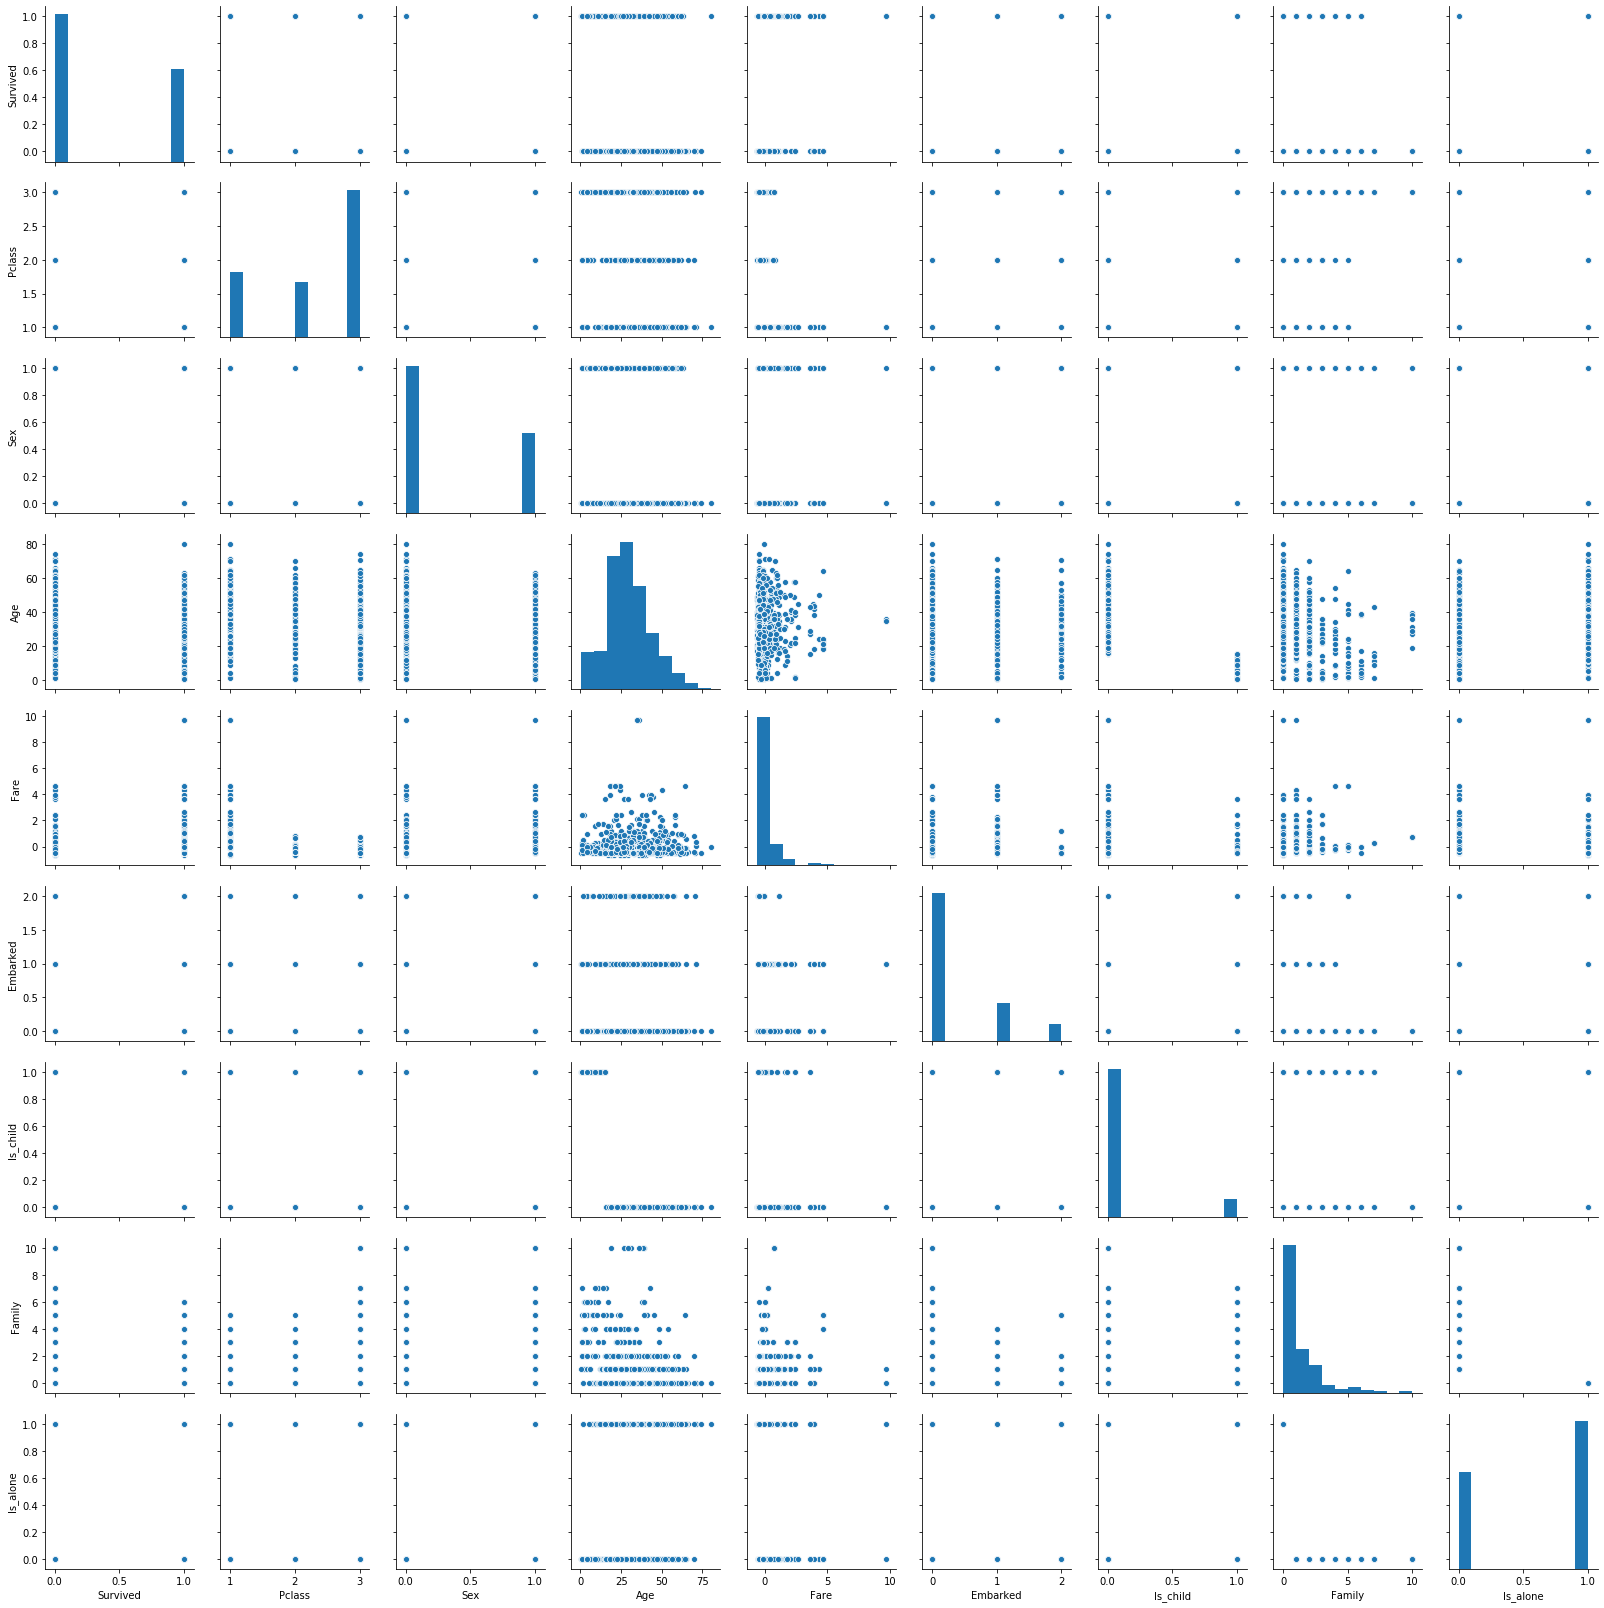

In [36]:
# Pairplot 
sns.pairplot(titanic)

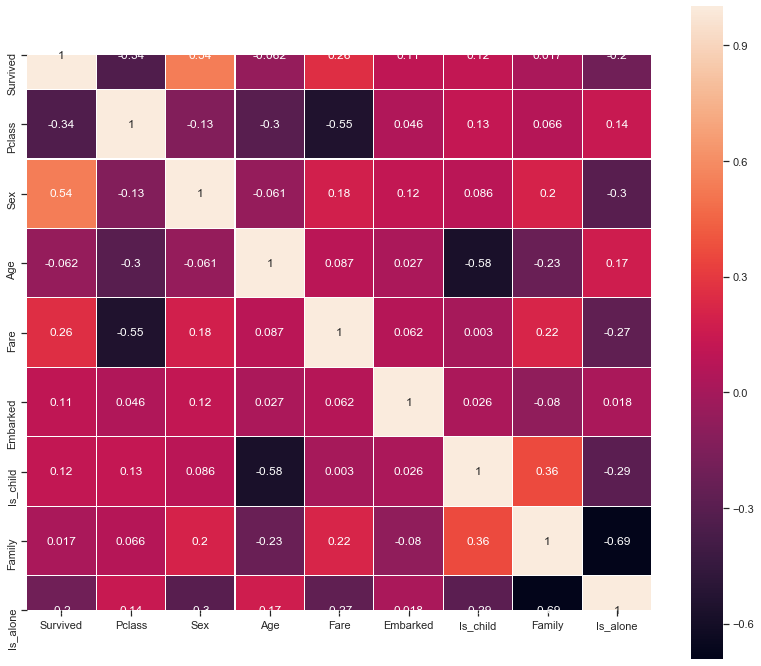

In [37]:
# Heatmap
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(titanic.astype(float).corr(), 
            linewidths=0.1, 
            square=True, 
            linecolor='white', 
            annot=True)
plt.show()

## Building Machine Learning Models

In [38]:
# Split into train and test data

# y is the survival column
y = titanic['Survived']
# remove survival column from the dataset   
del titanic['Survived']
x_train, x_test, y_train, y_test = train_test_split(titanic, y, test_size=0.2, random_state = 0)

## Try different classification models and compare accuracy score on the x_test data 

In [39]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [40]:
# Logistic Regression 
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc_lr_test = round( lr.score(x_test, y_test) * 100, 2)
acc_lr_train = round( lr.score(x_train, y_train) * 100, 2)
lr_scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
acc_lr_cv = round(lr_scores.mean() * 100, 2) 

In [41]:
# Support Vector Machines
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
acc_svm_test = round( svm.score(x_test, y_test) * 100, 2)
acc_svm_train = round( svm.score(x_train, y_train) * 100, 2)
svm_scores = cross_val_score(svm, x_train, y_train, cv=10, scoring = "accuracy")
acc_svm_cv = round(svm_scores.mean() * 100, 2) 

In [42]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
acc_knn_test = round( knn.score(x_test, y_test) * 100, 2)
acc_knn_train = round( knn.score(x_train, y_train) * 100, 2)
knn_scores = cross_val_score(knn, x_train, y_train, cv=10, scoring = "accuracy")
acc_knn_cv = round(knn_scores.mean() * 100, 2) 

In [43]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
acc_dt_test = round( dt.score(x_test, y_test) * 100, 2)
acc_dt_train = round( dt.score(x_train, y_train) * 100, 2)
dt_scores = cross_val_score(dt, x_train, y_train, cv=10, scoring = "accuracy")
acc_dt_cv = round(dt_scores.mean() * 100, 2) 

In [44]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
acc_rf_test = round( rf.score(x_test, y_test) * 100, 2)
acc_rf_train = round( rf.score(x_train, y_train) * 100, 2)
rf_scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
acc_rf_cv = round(rf_scores.mean() * 100, 2) 

In [45]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
acc_gnb_test = round( gnb.score(x_test, y_test) * 100, 2)
acc_gnb_train = round( gnb.score(x_train, y_train) * 100, 2)
gnb_scores = cross_val_score(gnb, x_train, y_train, cv=10, scoring = "accuracy")
acc_gnb_cv = round(gnb_scores.mean() * 100, 2) 

In [46]:
# Perceptron
p = Perceptron()
p.fit(x_train, y_train)
acc_p_test = round( p.score(x_test, y_test) * 100, 2)
acc_p_train = round( p.score(x_train, y_train) * 100, 2)
p_scores = cross_val_score(p, x_train, y_train, cv=10, scoring = "accuracy")
acc_p_cv = round(p_scores.mean() * 100, 2) 

In [47]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=20, tol=None)
sgd.fit(x_train, y_train)
acc_sgd_test = round( sgd.score(x_test, y_test) * 100, 2)
acc_sgd_train = round( sgd.score(x_train, y_train) * 100, 2)
sgd_scores = cross_val_score(sgd, x_train, y_train, cv=10, scoring = "accuracy")
acc_sgd_cv = round(sgd_scores.mean() * 100, 2) 

In [48]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 
              'KNN', 'Decision Tree', 'Random Forest',  'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Descent'],
    
    'Test Accuracy': [acc_lr_test, acc_svm_test, 
              acc_knn_test, acc_dt_test, acc_rf_test, acc_gnb_test, 
              acc_p_test, acc_sgd_test],
    
    'Train Accuracy': [acc_lr_train, acc_svm_train, 
              acc_knn_train, acc_dt_train, acc_rf_train, acc_gnb_train, 
              acc_p_train, acc_sgd_train],
    
    'Cross Validation Accuracy':  [acc_lr_cv, acc_svm_cv, 
              acc_knn_cv, acc_dt_cv, acc_rf_cv, acc_gnb_cv, 
              acc_p_cv, acc_sgd_cv]
    })

models.sort_values(by='Test Accuracy', ascending=False)
# As shown below, random forest classification gives us the highest accuracy score. 

,Model,Test Accuracy,Train Accuracy,Cross Validation Accuracy
4,Random Forest,82.12,98.74,78.93
5,Naive Bayes,79.89,79.92,79.36
0,Logistic Regression,79.33,80.20,80.06
3,Decision Tree,79.33,98.88,75.84
7,Stochastic Gradient Descent,79.33,78.79,76.38
1,Support Vector Machine,78.77,79.49,79.36
6,Perceptron,78.21,80.48,60.96
2,KNN,75.98,85.81,72.06


From the above table, even though random forest has the highest test accuracy, it suffers from overfitting as the train accuracy is much higher than cross-validation accuracy. Decison tree suffers from the same problem. However, since random forest has the highest test accuracy, I want to try decreasing model complexity and see we can solve the overfitting issue. 

Naive Bayes and logistic regression both achieve similar test accuracy and do not suffer from overfitting. Naive Bayes classifier is a supervised learning algorithm based on the Bayes theorem. There are some significant advantages of Naive Bayes, including it being fast, simple and accurate, having low computation cost and high efficiency on large datasets. However, there're also significant disadvantages. One is its assumption of independent features, which is nearly impossible for real-world dataset. For titanic data, we know this isn't possible since the is_alone feature depends on family (number of family members on board) and is_child depends on age. Another drawback of Naive Bayes is its inability to make predictions when there's no training tuple of a particular class; this is known as the zero probability problem. 

Logistic regression classifier is a supervised classification algorithm that is efficient, straight-forward and doesn't need much computational power. It doesn't require feature scaling and can provide a probability score for observations. The downside is that it can be vulnerable to overfitting and requires tranformation of nonlinear features. It performs pretty well on our titanic dataset and could be a potential choice for our model.

In [49]:
# Understand feature importace 
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Age,0.274
Fare,0.264
Sex,0.251
Pclass,0.079
Family,0.061
Embarked,0.036
Is_child,0.019
Is_alone,0.017


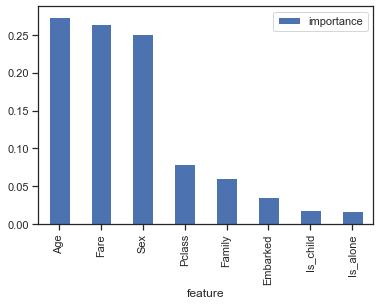

In [50]:
importances.plot.bar()

Is_alone has the lowest importance score, which is understable since it is a feature derived from the Family (number of family members on board) feature. Since I don't have too many features, I don't want to drop it yet. Let's see if the overfitting problem can be solved by changing the max_depth and min_samples_leaf parameters in random search. 

In [51]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth = 4, min_samples_leaf = 4)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
acc_rf_test = round( rf.score(x_test, y_test) * 100, 2)
acc_rf_train = round( rf.score(x_train, y_train) * 100, 2)
rf_scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
acc_rf_cv = round(rf_scores.mean() * 100, 2) 
print("Test Accuracy:", acc_rf_test)
print("Train Accuracy:", acc_rf_train)
print("Cross Validation Accuracy", acc_rf_cv)

Test Accuracy: 83.8
Train Accuracy: 84.41
Cross Validation Accuracy 82.3


In the previous step, I have played with different combinations of parameters for the random forest classifier and I believe the current one provides the best result. It solves the overfitting problem while still maintaining a good accuracy. Since random forest gives the highest test accuracy overall, I'm going to pick it as my model. However, I am not going to do a grid search to determine the best parameters to use because I don't want to risk having my model overfit the data again. 

## Model Evaluation

[[104   6]
 [ 23  46]]


Text(0.5, 257.44, 'Predicted label')

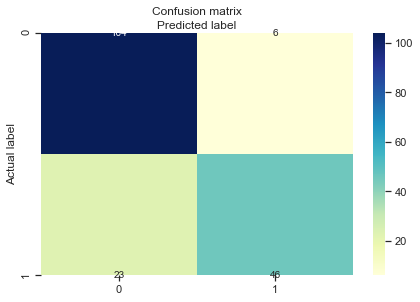

In [52]:
# Confusion Matrix 

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
# Generate and display different evaluation metrics
print("ROC-AUC Score:", round(metrics.roc_auc_score(y_test, predictions), 2))
print(metrics.classification_report(y_test, predictions))

ROC-AUC Score: 0.81
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       110
           1       0.88      0.67      0.76        69

    accuracy                           0.84       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



ROC-AUC score shows the tradeoff between sensitivity and specificity. Our ROC score, though not very high, is quite reasonable. 

In [54]:
print("Precision:", round(metrics.precision_score(y_test, predictions), 2))
print("Recall:", round(metrics.recall_score(y_test, predictions), 2))
print("F1-score:", round(metrics.f1_score(y_test, predictions), 2))

Precision: 0.88
Recall: 0.67
F1-score: 0.76


Random forest is an ensemble supervised learning technique that builds numerous decision trees and merges them together for a more accurate and stable prediction. It has the advantage of enabling straight-forward measurement of feature importance, and we get to see how each feature comes into play in the machine learning model. The disadvantage is that it can be time-consuming because it has to run through multiple decision trees before prediction. 

 ## Implement model on holdout data 

In [55]:
# Drop Survived column in the test data since this is our target variable
holdout.drop(columns = ['Survived'], inplace = True)
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int64
Is_child    418 non-null int64
Family      418 non-null int64
Is_alone    418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [56]:
pred = rf.predict(holdout)
pred[:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [57]:
test = pd.read_csv('holdout_test.csv')
Survival = pd.DataFrame({'PassengerId':test['PassengerId'],"Survived": pred}) 
Survival.to_csv("Titanic Results from Ariel Li.csv", index = False)